# Goal 

The goal of this notebook is to analyze different columns present in the file : 

**V3_Spectralis_RNFL_ALL_Data_Merge_08202024_combined_with_data_split_OCTImagePath_VF24_VF10_Fundus_11072024.csv**

Good understanding of each & every column can allow us to build better OCT captioning data points to perform robust fine tuning for the
Llava model.


> Current motivation is to use all data points with all possible labels from the train split. All these datapoints will allow us to align CLIP based features for OCT images with some differentiating eye property.

> More data in this alignment phase will give us better performance for our eye scan data. IDEA : Do not use LlavaInstruct weights. Try to use Llava weights just after its original pre-training stage i.e. after learning the simple image captioning task. (**MedLlava states llava instruct weights are a better place to start**)

> Can add the label in natural text format just after the text descriptions we have.

In [1]:
file_path = "/tscc/nfs/home/vejoshi/vlm_comparison/ret_found_baseline_non_vlm/RETFound_MAE/data_csv_file/\
V3_Spectralis_RNFL_ALL_Data_Merge_08202024_combined_with_data_split_OCTImagePath_VF24_VF10_Fundus_11072024.csv"

# Basic Imports

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random

# Focus only on OCT images for this project

In [3]:
df = pd.read_csv(file_path)
df = df[~df["OCTImagePath"].isna()]
print("Total number of OCT images available           : ",len(df))
print("Total number of cases without text description : ",len(df[df["TextDescriptionPath"].isna()]))

/tmp/ipykernel_1758897/1954805968.py:1: DtypeWarning: Columns (2,4,10,11,40,42,43,44,45,54,95,116,125,434,435,436,437,438,443,444,451,452,461,470,479,480,489,490,497,498,503,504,505,506,507,508,509,510,511,512,517,518,525,526,535,544,553,554,563,564,571,572,577,578,579,580,581,623,643,652) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Total number of OCT images available           :  69169
Total number of cases without text description :  0


# Different distributions :

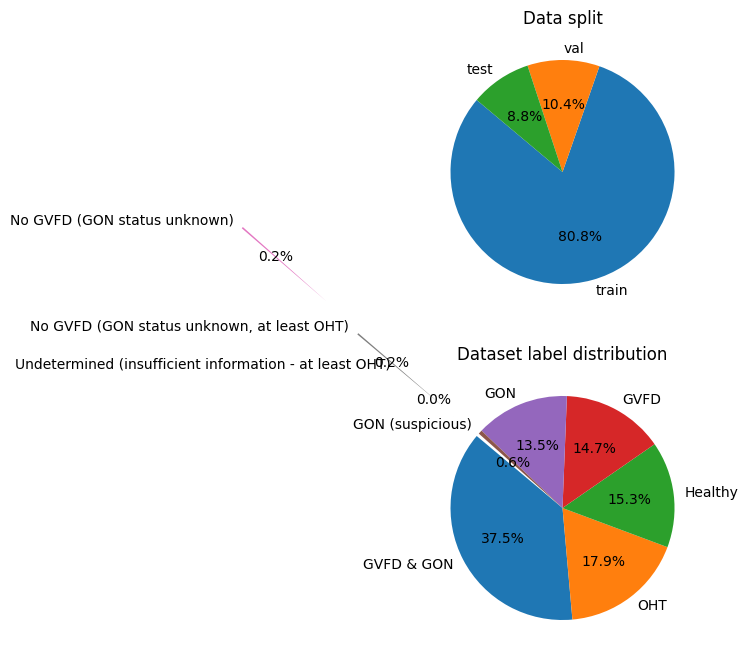

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].pie(df["Split"].value_counts(), 
        labels=df["Split"].value_counts().index, 
        autopct='%1.1f%%', 
        startangle=140)
axs[0].set_title("Data split")

axs[1].pie(df["EyeDX_at_spectralisDate"].value_counts(), 
        labels=df["EyeDX_at_spectralisDate"].value_counts().index, 
        autopct='%1.1f%%',
        explode=(0,0,0,0,0,0,2.8,1.4,0.9),
        startangle=140)
axs[1].set_title("Dataset label distribution")
plt.show()

# Text label distribution 

* Max token length can be kept as *200* for this dataset.
* Generally we do have decently long descriptions.

In [14]:
text_len = []
for i in tqdm(df["TextDescriptionPath"], position = 0, leave = True):
    with open(i, "r") as f:
        text_len.append(len(f.read().split()))

100%|██████████| 69169/69169 [00:28<00:00, 2399.69it/s]


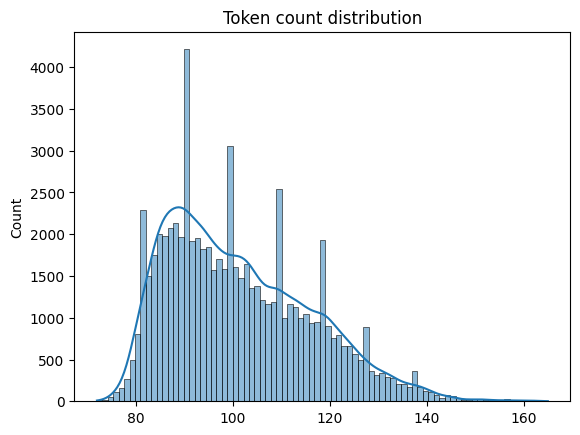

In [15]:
# Using histplot (histogram only)
sns.histplot(text_len, kde=True)
plt.title("Token count distribution")
plt.show()

# Text templates to add labels 

Used chatGPT to add different text labels into a natural text format.

In [38]:
templates = ["This eye scan shows {}.",
            "The scan indicates {} in this eye.",
            "This eye appears to have {}.",
            "Based on the scan, the condition of the eye is {}.",
            "The scan results suggest {} for this eye.",
            "This image reveals the presence of {} in the eye.",
            "This eye is diagnosed with {}.",
            "The condition observed in this eye scan is {}.",
            "This eye shows {} based on the analysis.",
            "The scan confirms that the eye has {}.",
            "The scan reveals a {} status for this eye.",
            "There are indications of {} in this eye scan.",
            "Based on the scan, there is evidence of {}.",
            "This eye is classified as having {}.",
            "The scan of this eye shows a {} condition.",
            "The findings from this scan suggest {}.",
            "This eye scan suggests {} status.",
            "There is {} seen in this eye scan.",
            "This image shows the presence of {} in the eye."]

In [46]:
df["label_sentence"] = df["EyeDX_at_spectralisDate"].apply(lambda x : random.sample(templates,1)[0].format(x))
df.tail()

,PatientID,ideye,OCTImagePath,TextDescriptionPath,Split,Eye,Age_at_SpectralisDate,gender,ethnicity,race_primary_nih,...,VF10_sFLAGAbn3ConsecConfirmed,VF10_sFLAGAbn3ConsecUnconfirmed,VF10_sFLAGNorm3ConsecConfirmed,VF10_sFLAGNorm3ConsecUnconfirmed,OCT_VF10_Date_Difference,Fundus_PhotoLocation,Fundus_PhotoFilename,Fundus_Date,OCT_Fundus_Date_Difference,label_sentence
69282,SD8260,SD8260 OD,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,R,67.315537,Female,Not Hispanic,White,...,NaN,NaN,NaN,NaN,1.013005,20170207_Photos/SD8260,SD8260_2015_03_16_OD.JPG,3/16/15,7.173169,This image reveals the presence of GVFD in the...
69283,SD8260,SD8260 OD,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,R,67.315537,Female,Not Hispanic,White,...,NaN,NaN,NaN,NaN,1.013005,20170207_Photos/SD8260,SD8260_2015_03_16_OD.JPG,3/16/15,7.173169,This eye shows GVFD based on the analysis.
69284,SD8260,SD8260 OD,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,R,68.328542,Female,Not Hispanic,White,...,NaN,NaN,NaN,NaN,0.000000,20170207_Photos/SD8260,SD8260_2015_03_16_OD.JPG,3/16/15,8.186174,The scan results suggest GVFD for this eye.
69285,SD8260,SD8260 OD,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,R,68.328542,Female,Not Hispanic,White,...,NaN,NaN,NaN,NaN,0.000000,20170207_Photos/SD8260,SD8260_2015_03_16_OD.JPG,3/16/15,8.186174,The scan indicates GVFD in this eye.
69286,SD8260,SD8260 OD,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,R,68.328542,Female,Not Hispanic,White,...,NaN,NaN,NaN,NaN,0.000000,20170207_Photos/SD8260,SD8260_2015_03_16_OD.JPG,3/16/15,8.186174,The scan confirms that the eye has GVFD.


# Keep only important columns

> Can add filering logic in this notebook & update the pre-training csv file

In [47]:
keep_cols = ["PatientID", "ideye", "OCTImagePath", "TextDescriptionPath",
            "Split", "Eye", "Age_at_SpectralisDate", "gender", "ethnicity",
            "race_primary_nih", "Diabetes", "Hypertension", "EyeDX_at_spectralisDate",
            "EyeDX_at_spectralisDate_DX_Date", "Spectralis_DX_Date_Difference", "Current_EyeDX",
            "Spectralis_RNFL_ImageID", "Spectralis_RNFL_ExamDate", "Spectralis_RNFL_ExamTime",
            "ScanType", "DiameterInmm", "DiameterInDegrees", "FixedInMM", "Spectralis_RNFL_QCQualityScore",
            "RevisedImageID", "OCT_VF10_Date_Difference", "Fundus_PhotoLocation",  "Fundus_PhotoFilename",
            "Fundus_Date",  "OCT_Fundus_Date_Difference", "label_sentence"]

final_df = df[keep_cols]
final_df.to_csv("/tscc/nfs/home/vejoshi/vlm_comparison/ret_found_baseline_non_vlm/RETFound_MAE/data_csv_file/processed_pretraining.csv")

In [5]:
df

,PatientID,ideye,OCTImagePath,TextDescriptionPath,Split,Eye,Age_at_SpectralisDate,gender,ethnicity,race_primary_nih,...,VF10_cIsNORMAL_FLAG_Confirmed_ByTestType,VF10_sFLAGAbn3ConsecConfirmed,VF10_sFLAGAbn3ConsecUnconfirmed,VF10_sFLAGNorm3ConsecConfirmed,VF10_sFLAGNorm3ConsecUnconfirmed,OCT_VF10_Date_Difference,Fundus_PhotoLocation,Fundus_PhotoFilename,Fundus_Date,OCT_Fundus_Date_Difference
0,AL0320,AL0320 OS,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,L,55.852156,Female,Not Hispanic,Black or African American,...,NaN,NaN,NaN,NaN,NaN,2.091718,DODRC/AL0320,AL0320_2012_07_25_OS_02.JPG,7/25/12,0.000000
1,AL0320,AL0320 OS,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,L,55.852156,Female,Not Hispanic,Black or African American,...,NaN,NaN,NaN,NaN,NaN,2.091718,DODRC/AL0320,AL0320_2012_07_25_OS_02.JPG,7/25/12,0.000000
2,AL0320,AL0320 OS,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,L,55.852156,Female,Not Hispanic,Black or African American,...,NaN,NaN,NaN,NaN,NaN,2.091718,DODRC/AL0320,AL0320_2012_07_25_OS_02.JPG,7/25/12,0.000000
3,AL0320,AL0320 OS,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,L,56.443532,Female,Not Hispanic,Black or African American,...,NaN,NaN,NaN,NaN,NaN,1.500342,DODRC/AL0320,AL0320_2012_07_25_OS_02.JPG,7/25/12,0.591376
4,AL0320,AL0320 OS,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,L,56.443532,Female,Not Hispanic,Black or African American,...,NaN,NaN,NaN,NaN,NaN,1.500342,DODRC/AL0320,AL0320_2012_07_25_OS_02.JPG,7/25/12,0.591376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69282,SD8260,SD8260 OD,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,R,67.315537,Female,Not Hispanic,White,...,NaN,NaN,NaN,NaN,NaN,1.013005,20170207_Photos/SD8260,SD8260_2015_03_16_OD.JPG,3/16/15,7.173169
69283,SD8260,SD8260 OD,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,R,67.315537,Female,Not Hispanic,White,...,NaN,NaN,NaN,NaN,NaN,1.013005,20170207_Photos/SD8260,SD8260_2015_03_16_OD.JPG,3/16/15,7.173169
69284,SD8260,SD8260 OD,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,R,68.328542,Female,Not Hispanic,White,...,NaN,NaN,NaN,NaN,NaN,0.000000,20170207_Photos/SD8260,SD8260_2015_03_16_OD.JPG,3/16/15,8.186174
69285,SD8260,SD8260 OD,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,R,68.328542,Female,Not Hispanic,White,...,NaN,NaN,NaN,NaN,NaN,0.000000,20170207_Photos/SD8260,SD8260_2015_03_16_OD.JPG,3/16/15,8.186174


In [6]:
tmp_df = pd.read_csv("./data_csv_file/V3_Spectralis_GON_GVFD_COMB_HEALTHY.csv")
tmp_df.head()

/tmp/ipykernel_1758897/2155587443.py:1: DtypeWarning: Columns (11,41,43,44,45,46,55,96,126,435,436,437,438,439,444,445,452,453,462,471,480,481,490,491,498,499,504,505,506,507,508,509,510,511,512,513,518,519,526,527,536,545,554,555,564,565,572,573,578,579,580,581,582,624,653) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv("./data_csv_file/V3_Spectralis_GON_GVFD_COMB_HEALTHY.csv")


,Unnamed: 0,PatientID,ideye,OCTImagePath,TextDescriptionPath,Split,Eye,Age_at_SpectralisDate,gender,ethnicity,...,VF10_cIsNORMAL_FLAG_Confirmed_ByTestType,VF10_sFLAGAbn3ConsecConfirmed,VF10_sFLAGAbn3ConsecUnconfirmed,VF10_sFLAGNorm3ConsecConfirmed,VF10_sFLAGNorm3ConsecUnconfirmed,OCT_VF10_Date_Difference,Fundus_PhotoLocation,Fundus_PhotoFilename,Fundus_Date,OCT_Fundus_Date_Difference
0,55,AL0333,AL0333 OS,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,L,73.864476,Female,Not Hispanic,...,NaN,NaN,NaN,NaN,NaN,NaN,DODRC/AL0333,AL0333_2011_04_12_OS_01.JPG,4/12/11,0.0
1,56,AL0333,AL0333 OS,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,L,74.899384,Female,Not Hispanic,...,NaN,NaN,NaN,NaN,NaN,NaN,DODRC/AL0333,AL0333_2012_04_24_OS_01.JPG,4/24/12,0.0
2,57,AL0333,AL0333 OS,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,L,73.864476,Female,Not Hispanic,...,NaN,NaN,NaN,NaN,NaN,NaN,DODRC/AL0333,AL0333_2011_04_12_OS_01.JPG,4/12/11,0.0
3,58,AL0333,AL0333 OS,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,L,73.864476,Female,Not Hispanic,...,NaN,NaN,NaN,NaN,NaN,NaN,DODRC/AL0333,AL0333_2011_04_12_OS_01.JPG,4/12/11,0.0
4,59,AL0333,AL0333 OS,/tscc/projects/ps-visres-group/Bscans_for_vols...,/tscc/projects/ps-visres-group/MM-LLM/descript...,train,L,74.899384,Female,Not Hispanic,...,NaN,NaN,NaN,NaN,NaN,NaN,DODRC/AL0333,AL0333_2012_04_24_OS_01.JPG,4/24/12,0.0


In [7]:
pid_set_train = set([i for i in tmp_df[tmp_df["Split"] == "train"]["PatientID"]])
pid_set_test  = set([i for i in tmp_df[tmp_df["Split"] == "test"]["PatientID"]])

In [8]:
len(pid_set_train.intersection(pid_set_test))

0

In [10]:
len(pid_set_test)

137

In [11]:
len(pid_set_train)

1118

In [13]:
tmp_df["EyeDX_at_spectralisDate"].unique()

array(['GVFD & GON', 'Healthy', 'GVFD'], dtype=object)

In [14]:
tmp_df[tmp_df["Split"] == "test"]["EyeDX_at_spectralisDate"].value_counts()

EyeDX_at_spectralisDate
GVFD & GON    2030
GVFD          1086
Healthy        844
Name: count, dtype: int64

In [15]:
tmp_df[tmp_df["Split"] == "train"]["EyeDX_at_spectralisDate"].value_counts()

EyeDX_at_spectralisDate
GVFD & GON    21430
Healthy        8672
GVFD           8080
Name: count, dtype: int64

In [21]:
tmp_df_2 = pd.read_csv("./data_csv_file/OCT_CS_VFMD_RevisedImagePath.csv")
tmp_df_2[tmp_df_2["split"] == "test"]
v1 = set(tmp_df_2[tmp_df_2["split"] == "test"]["Lastname"].unique()) 

In [23]:
len(v1.intersection(pid_set_test))

13